# Nibabel Library

https://nipy.org/nibabel/

```conda install -c conda-forge nibabel```

In [24]:
from numpy import concatenate, zeros, linspace

from matplotlib.pyplot import subplots, tight_layout, show

import nibabel as nib


## Load images and get data

In [2]:
img_nibabel = nib.load("T1_mask.nii")

type(img_nibabel)

nibabel.nifti1.Nifti1Image

In [3]:
meta_info = img_nibabel.header

print(meta_info)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 128  70   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   2.   2.   2.2  0.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 125.5061
qoffset_y       : -109.38977
qoffset_z       : -86.742615
srow_x      

In [4]:
img1 = img_nibabel.get_fdata()

print(type(img1), img1.shape)


<class 'numpy.memmap'> (128, 128, 70)


In [5]:
img_nibabel = nib.load("b0_mask.nii")

img2 = img_nibabel.get_fdata()


In [6]:
img1.shape, img2.shape


((128, 128, 70), (128, 128, 70))

## Plot images

In [7]:
img_slice = 42

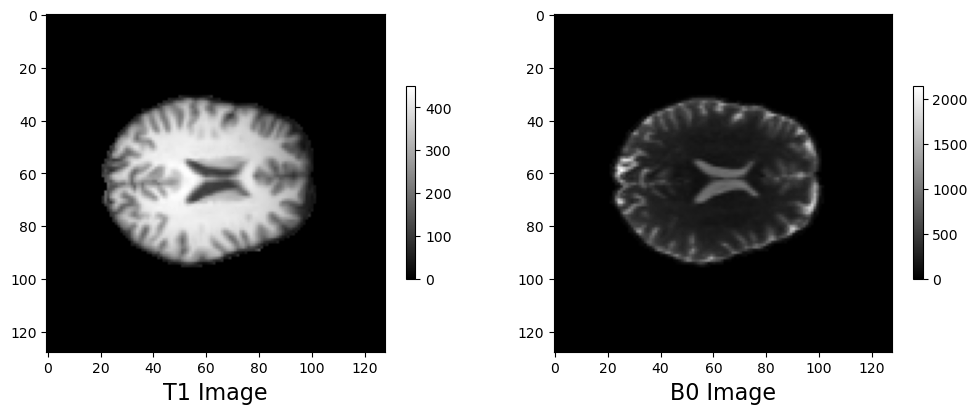

In [23]:
fig, ax = subplots(ncols=2, figsize=(12, 5))

f1 = ax[0].imshow(img1[:, :, img_slice], cmap="gray")
f2 = ax[1].imshow(img2[:, :, img_slice], cmap="gray")

fig.colorbar(f1, ax=ax[0], shrink=0.5)
fig.colorbar(f2, ax=ax[1], shrink=0.5);

ax[0].set_xlabel('T1 Image', fontsize=16);
ax[1].set_xlabel('B0 Image', fontsize=16);

show()

# Pre-processing

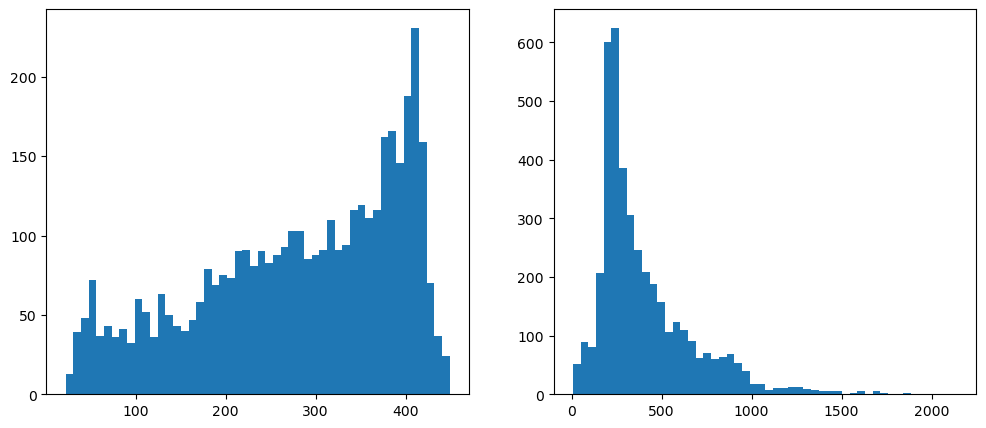

In [21]:
img1_slice = img1[:, :, img_slice]
img2_slice = img2[:, :, img_slice]

mask = (img1_slice>0) & (img2_slice>0) 

img1_nz = img1_slice[mask]
img2_nz = img2_slice[mask]

fig, ax = subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].hist(img1_nz, bins=50)
ax[1].hist(img2_nz, bins=50);

show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

img1_scaled = scaler.fit_transform(img1_nz.reshape(-1, 1))
img2_scaled = scaler.fit_transform(img2_nz.reshape(-1, 1))


## Visualise and Concatenate

Seaborn: https://seaborn.pydata.org

c.f. pair grid example
https://seaborn.pydata.org/examples/pair_grid_with_kde.html

kdeplot documentation
https://seaborn.pydata.org/generated/seaborn.kdeplot.html




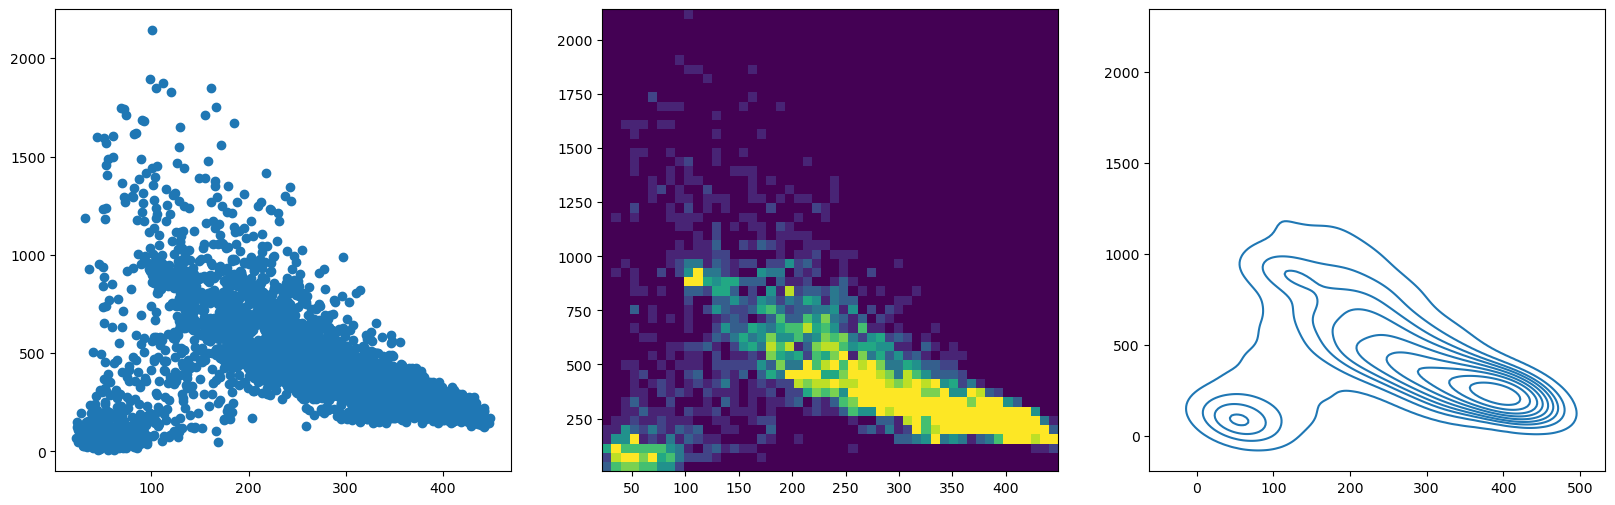

In [11]:
fig, ax = subplots(1, 3, figsize=(20, 6))

# Scatter plot
ax[0].scatter(img1_nz, img2_nz)

# 2D Histogram
ax[1].hist2d(img1_nz, img2_nz, bins=50, vmax=10);

from seaborn import kdeplot

# Density Plot
kdeplot(x=img1_nz, y=img2_nz, ax=ax[2]);

show()

In [12]:
all_img_scaled = concatenate([img1_scaled, img2_scaled], axis=1)

all_img_scaled.shape

(4132, 2)

# GMM clustering


In [13]:
from sklearn.mixture import GaussianMixture

In [14]:
n_components = 3

gmm = GaussianMixture(n_components=n_components, random_state=111)

all_img_labels = gmm.fit_predict(all_img_scaled)

all_img_labels[0]


2

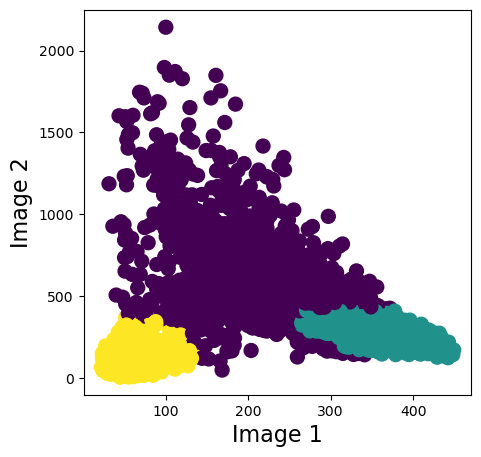

In [20]:
fig, ax = subplots(figsize=(5, 5))

ax.scatter(img1_nz, img2_nz, c=all_img_labels, s=100)

ax.set_xlabel('Image 1', fontsize=16)
ax.set_ylabel('Image 2', fontsize=16);

show()

In [16]:
all_img_labels_mapped = zeros(img1_slice.shape)

all_img_labels_mapped[mask] = all_img_labels


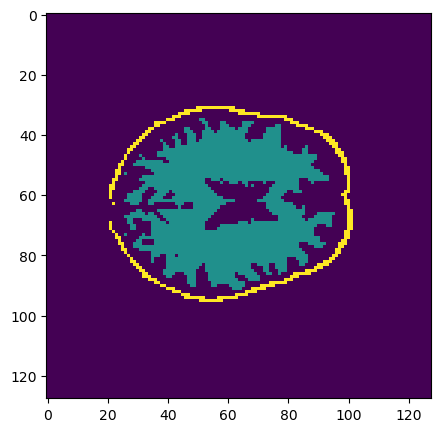

In [19]:
fig, ax = subplots(figsize=(5, 5))

ax.imshow(all_img_labels_mapped);

show()